In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [49]:
df = pd.read_csv('homepage_actions.csv')
df.sample(5)

,timestamp,id,group,action
2126,2016-10-24 16:49:41.897617,606601,experiment,view
4270,2016-11-24 09:55:54.875842,309775,control,view
4894,2016-12-04 02:04:39.705328,866455,control,view
6690,2016-12-29 06:50:26.627140,759651,experiment,view
1320,2016-10-13 07:40:11.272984,768242,experiment,view


In [50]:
df.shape

(8188, 4)

In [51]:
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [52]:
df.groupby('group').nunique()

,timestamp,id,group,action
group,,,,
control,4264,3332,1,2
experiment,3924,2996,1,2


In [53]:
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [54]:
df.query('action == "click"').id.nunique() / df.query('action == "view"').id.nunique()

0.2939317319848293

In [55]:
df.timestamp.max(), df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

In [56]:
control_df = df.query('group == "control"')

In [57]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr

0.2797118847539016

In [58]:
experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

In [59]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [60]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

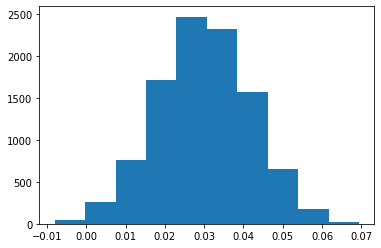

In [61]:
plt.hist(diffs);

In [62]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

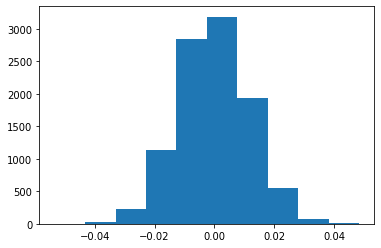

In [63]:
plt.hist(null_vals);

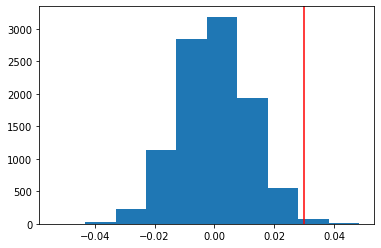

In [64]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = 'red');

In [65]:
p_value=(null_vals > obs_diff).mean()
p_value

0.0061